<a href="https://colab.research.google.com/github/khamesi1985/2025/blob/main/DT_with_Cross_Validation_for_WDBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best Parameters from Grid Search:  {'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 4}
Accuracy On Train Data =  0.9627329192546584
Precision On Train Data =  0.9550561797752809
Recall On Train Data =  0.9444444444444444
F1-Score On Train Data =  0.9497206703910615
TP On Train Data =  170
TN On Train Data =  295
FP On Train Data =  8
FN On Train Data =  10
              precision    recall  f1-score   support

           B       0.97      0.97      0.97       303
           M       0.96      0.94      0.95       180

    accuracy                           0.96       483
   macro avg       0.96      0.96      0.96       483
weighted avg       0.96      0.96      0.96       483

Accuracy On Test Data =  0.9651162790697675
Precision On Test Data =  0.967741935483871
Recall On Test Data =  0.9375
F1-Score On Test Data =  0.9523809523809523
TP On Test Data =  30
TN On Test Data =  53
FP On Test Data =  1
FN On Test Data =  2
              precision    recall  f1-score   support


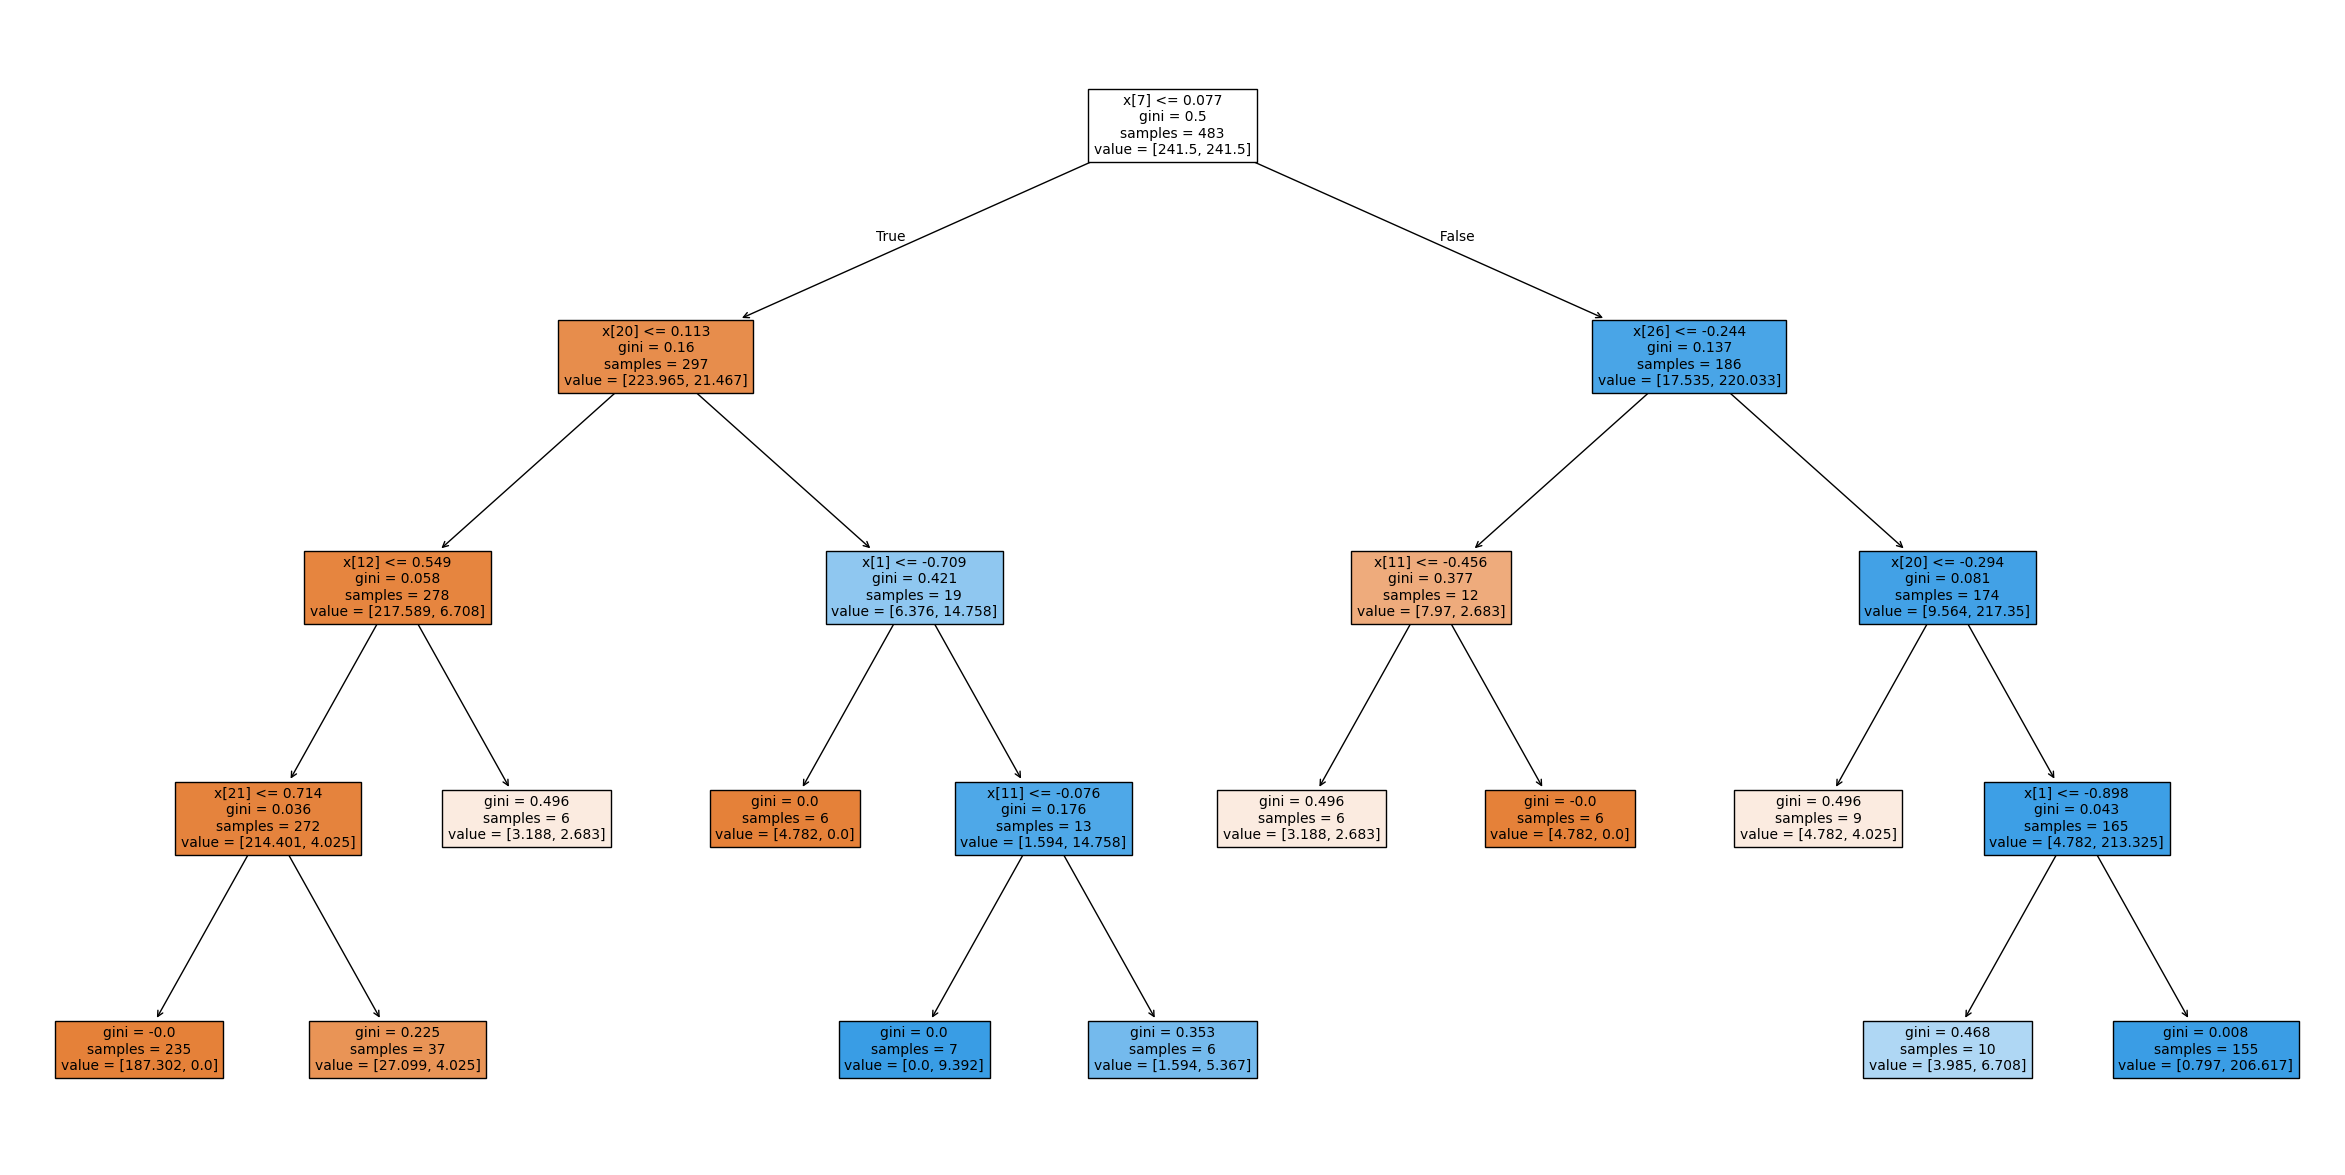

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# بارگذاری داده‌ها
url = "https://raw.githubusercontent.com/khamesi1985/2025/main/wdbc.data"
data = pd.read_csv(url, header=None)
X = data.iloc[:, 2:32]
Pre_Y = data.iloc[:, 1]
make_bin = LabelEncoder()
make_bin.fit(Pre_Y)
Y = make_bin.transform(Pre_Y)

# تقسیم داده‌ها به آموزش و آزمون
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

# استاندارد سازی داده ها
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# پیاده سازی مدل
model = tree.DecisionTreeClassifier(random_state=42, class_weight='balanced')
param_grid = {
    'max_depth': list(range(3, 8)),
    'min_samples_split': list(range(4, 10)),
    'min_samples_leaf': list(range(2, 20)),
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, scoring='f1_weighted')
grid_search.fit(X_train_scaled, Y_train)
print("Best Parameters from Grid Search: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
Y_pred_train = best_model.predict(X_train_scaled)
Y_pred_test = best_model.predict(X_test_scaled)

# محاسبه دقت مدل
accuracy_train = accuracy_score(Y_train, Y_pred_train)
precision_train = precision_score(Y_train, Y_pred_train)
recall_train = recall_score(Y_train, Y_pred_train)
f1_score_train = f1_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)
precision_test = precision_score(Y_test, Y_pred_test)
recall_test = recall_score(Y_test, Y_pred_test)
f1_score_test = f1_score(Y_test, Y_pred_test)
print("Accuracy On Train Data = ", accuracy_train)
print("Precision On Train Data = ", precision_train)
print("Recall On Train Data = ", recall_train)
print("F1-Score On Train Data = ", f1_score_train)
len_train = len(Y_train)
TN = TP = FN = FP = 0
for i in range (len_train):
  if Y_train[i] == 0 and Y_pred_train[i] == 1:
    FP = FP + 1
  elif Y_train[i] == 1 and Y_pred_train[i] == 0:
    FN = FN + 1
  elif Y_train[i] == 1 and Y_pred_train[i] == 1:
    TP = TP + 1
  elif Y_train[i] == 0 and Y_pred_train[i] == 0:
    TN = TN + 1
print("TP On Train Data = ", TP)
print("TN On Train Data = ", TN)
print("FP On Train Data = ", FP)
print("FN On Train Data = ", FN)
print(classification_report(Y_train, Y_pred_train, target_names=make_bin.classes_))
print("Accuracy On Test Data = ", accuracy_test)
print("Precision On Test Data = ", precision_test)
print("Recall On Test Data = ", recall_test)
print("F1-Score On Test Data = ", f1_score_test)
len_test = len(Y_test)
TN = TP = FN = FP = 0
for i in range (len_test):
  if Y_test[i] == 0 and Y_pred_test[i] == 1:
    FP = FP + 1
  elif Y_test[i] == 1 and Y_pred_test[i] == 0:
    FN = FN + 1
  elif Y_test[i] == 1 and Y_pred_test[i] == 1:
    TP = TP + 1
  elif Y_test[i] == 0 and Y_pred_test[i] == 0:
    TN = TN + 1
print("TP On Test Data = ", TP)
print("TN On Test Data = ", TN)
print("FP On Test Data = ", FP)
print("FN On Test Data = ", FN)
print(classification_report(Y_test, Y_pred_test, target_names=make_bin.classes_))

# ترسیم گراف درخت تصمیم
plt.figure(figsize=(30, 15))
tree.plot_tree(best_model, filled=True, fontsize=10)
plt.show()